In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 로드와 열 형식 변환

In [433]:
df = pd.read_csv('delivery_raw.csv', sep = '\t')
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [434]:
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift                                          float64
total_busy                                             float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [435]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [436]:
df.drop(['estimated_store_to_consumer_driving_duration', 'estimated_order_place_duration'], inplace=True, axis=1)
df = df.dropna(subset=['market_id', 'actual_delivery_time', 'store_primary_category', 'total_onshift', 'order_protocol'])

1. market_id, actual_delivery_time, stoer_primary_category, order_protocol  null인 행 삭제
2. estimated_store_to_consumer_driving_duration 열 삭제

#### target열 생성하고 데이터에 대한 이상치 처리

In [437]:
df['total_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

In [438]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,total_time
count,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2.743747,3556.618906,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800,2865.852600
std,1.330911,2055.987557,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344,1659.291664
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,101.000000
25%,2.000000,1703.000000,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,2105.000000
50%,2.000000,3620.000000,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,2662.000000
75%,4.000000,5341.000000,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000,3382.000000
max,6.000000,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,373879.000000


배달 시간

In [439]:
top_2_max = df['total_time'].nlargest(3).index
df_drop = df[~df.index.isin(top_2_max)]

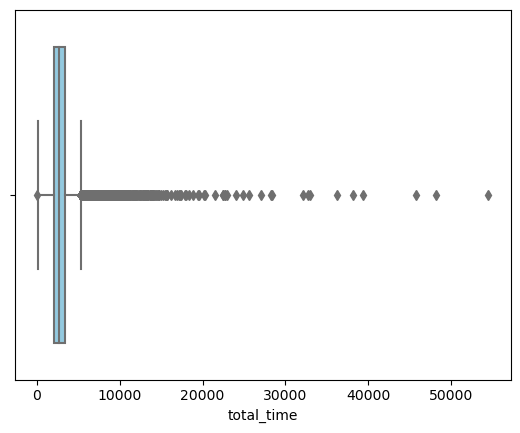

In [440]:
sns.boxplot(x=df_drop['total_time'], color='skyblue')
plt.show()

total_items

In [441]:
df_drop['total_items'].sort_values(ascending=False)

47231     411
182800     66
182796     64
75577      59
15053      57
         ... 
21419       1
42964       1
166470      1
166471      1
163089      1
Name: total_items, Length: 176245, dtype: int64

In [442]:
top_1_max = df_drop['total_items'].nlargest(1).index
df_drop = df_drop[~df_drop.index.isin(top_1_max)]

min_item_price

In [443]:
df_drop['min_item_price'].sort_values()

790         -86
187278      -52
170424      -51
46378       -48
46369       -35
          ...  
84085      7999
90756      8415
195513     8959
46914      8999
139718    14700
Name: min_item_price, Length: 176244, dtype: int64

In [444]:
df_drop = df_drop[df_drop['min_item_price'] >  0]

max_item_price

In [445]:
df_drop['max_item_price'].sort_values()

20226        60
115162       75
16956        85
49276        95
17559        95
          ...  
90756      8415
16862      8500
195513     8959
46914      8999
139718    14700
Name: max_item_price, Length: 174054, dtype: int64

total_onshift	

In [446]:
df_drop['total_onshift'].sort_values()

179225     -4.0
60282      -3.0
127163     -2.0
61131      -2.0
175279     -2.0
          ...  
140992    164.0
100018    165.0
190274    168.0
170897    169.0
21545     171.0
Name: total_onshift, Length: 174054, dtype: float64

In [447]:
df_drop = df_drop[df_drop['total_onshift'] > 0]

total_busy

In [448]:
df_drop['total_busy'].sort_values()

120296     -5.0
59764      -4.0
126816     -3.0
59370      -3.0
191717     -2.0
          ...  
85602     150.0
20270     150.0
168689    152.0
98033     152.0
27815     154.0
Name: total_busy, Length: 170531, dtype: float64

In [449]:
df_drop = df_drop[df_drop['total_busy'] > 0]

total_outstanding_orders

In [450]:
df_drop['total_outstanding_orders'].sort_values()

36317      -6.0
56554      -6.0
85718      -6.0
94795      -6.0
177152     -5.0
          ...  
44205     278.0
86385     278.0
110226    278.0
115743    283.0
20724     285.0
Name: total_outstanding_orders, Length: 169955, dtype: float64

In [451]:
df_drop = df_drop[df_drop['total_outstanding_orders'] > 0]

month, day, hour 열 추가

In [452]:
df_drop['month'] = df_drop['created_at'].dt.month
df_drop['hour'] = df_drop['created_at'].dt.hour
df_drop['day'] = df_drop['created_at'].dt.day
df_drop.drop(['created_at', 'actual_delivery_time'], inplace=True, axis=1)

In [453]:
# 범주형 열 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_drop['store_primary_category'] =  le.fit_transform(df_drop['store_primary_category'])

<Axes: >

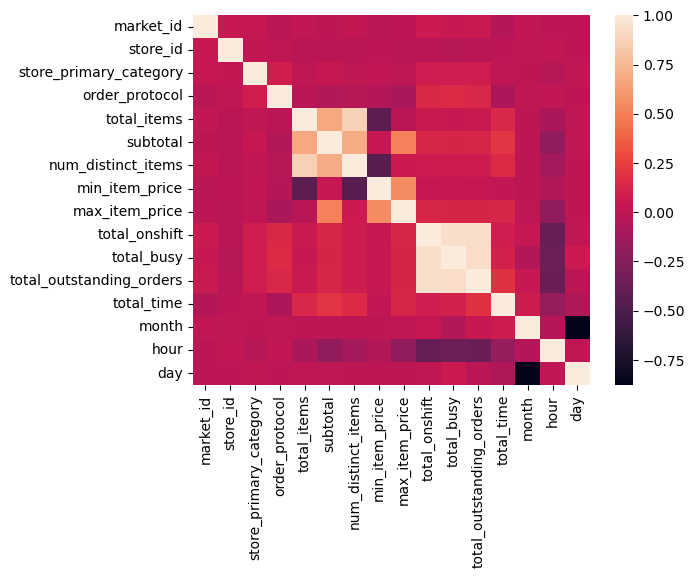

In [455]:
# 각 열에 대한 상관관계 heatmap
sns.heatmap(df_drop.corr())

(0.0, 10000.0)

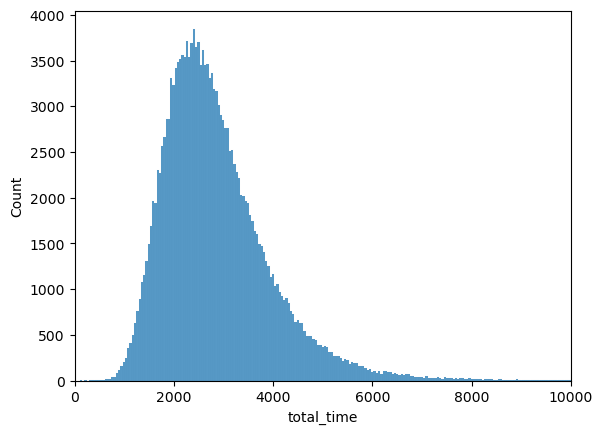

In [456]:
# 배달 소요시간에 대한 히스토그램
sns.histplot(x=df['total_time'])
plt.xlim(0, 10000)

#### 모델 훈련과 예측 수행 단계

In [482]:
from sklearn.model_selection import train_test_split

x = df_drop.drop(['total_time'], axis=1)
y = df_drop['total_time']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=42)

In [493]:
import xgboost
from sklearn.model_selection import GridSearchCV

model = xgboost.XGBRegressor()

param_grid = {
    'n_estimators': [i*100 for i in range(1, 11)],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(model, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 및 모델 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# 최적의 모델을 사용하여 예측 수행
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_valid)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score: 935294.5605041966


#### 평가지표(under_predictions, rmse) 확인

In [494]:
from sklearn.metrics import mean_squared_error
def get_under_pred_ratio(pred, labels):
    cnt = 0
    for i, j in zip(pred, labels):
        if i < j:
            cnt += 1
    return cnt / len(labels)
print(get_under_pred_ratio(predictions, y_valid), mean_squared_error(predictions, y_valid)**(1/2))

0.42881555686505596 890.0616056394979


#### 예측값과 실제값의 분포 확인

(0.0, 8000.0)

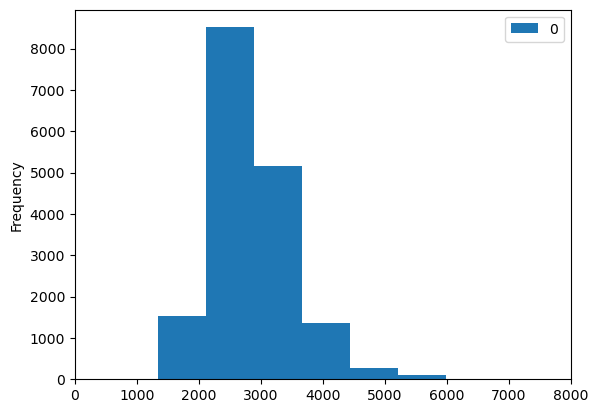

In [495]:
pd.DataFrame(predictions).plot(kind='hist')
plt.xlim(0, 8000)

(0.0, 8000.0)

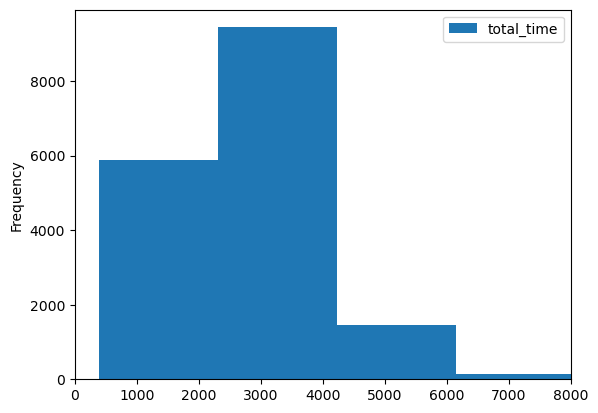

In [491]:
pd.DataFrame(y_valid).plot(kind='hist')
plt.xlim(0, 8000)